Step 0: Exploratory Data Analysis (EDA)
Step 0.1: Load the Dataset and Inspect

In [1]:
import pandas as pd

# Load the dataset
data_path = 'hemodat.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Head:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         6

Step 0.2: Visualize Distributions

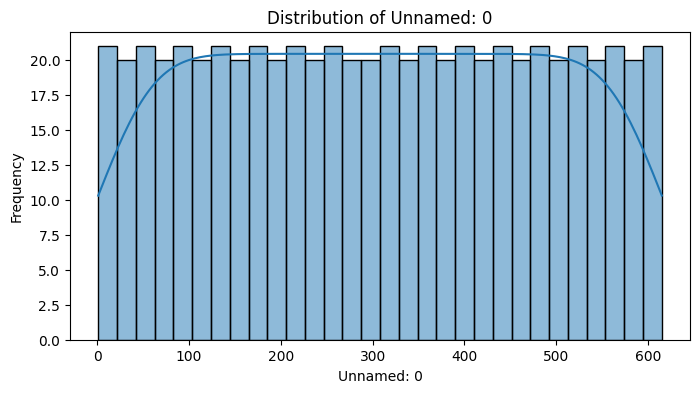

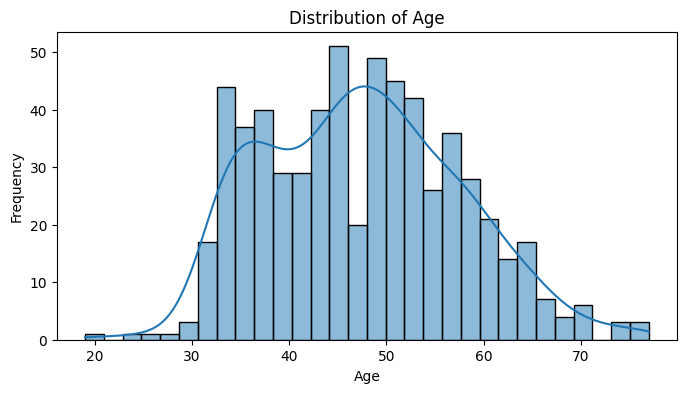

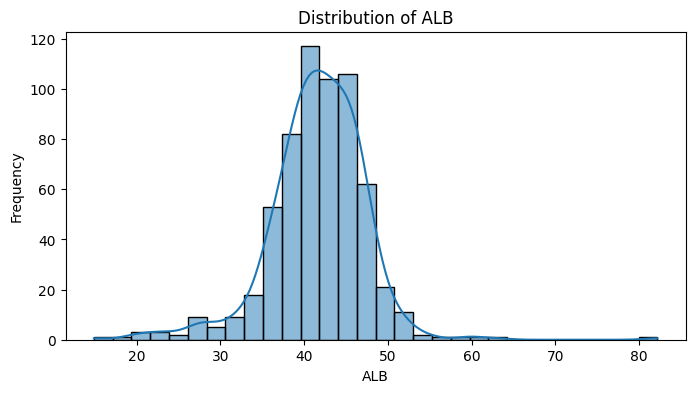

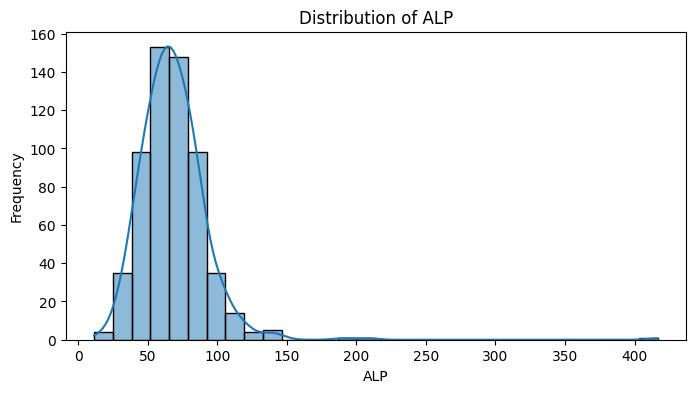

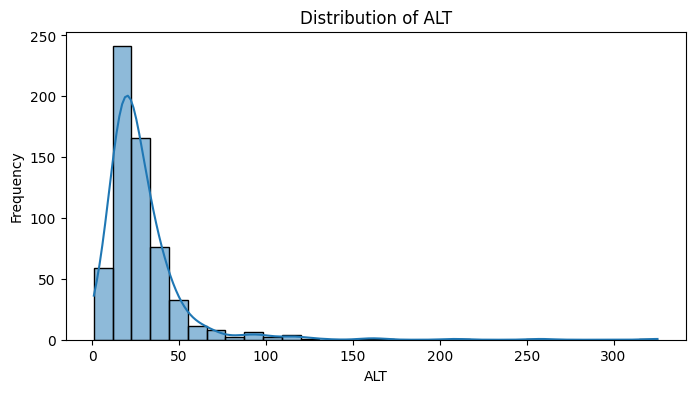

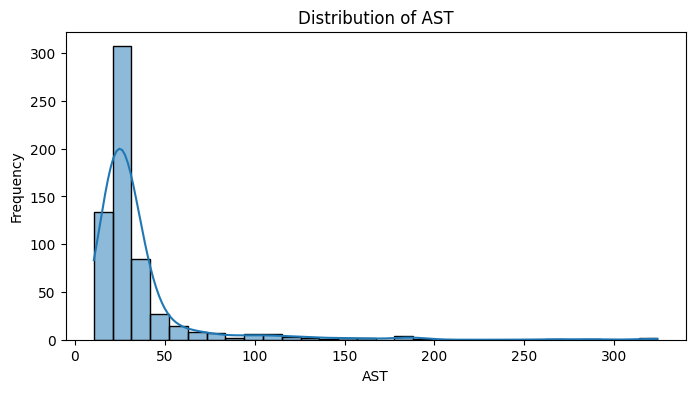

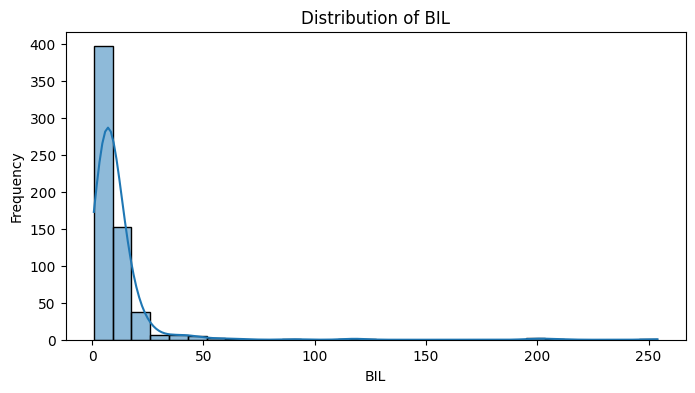

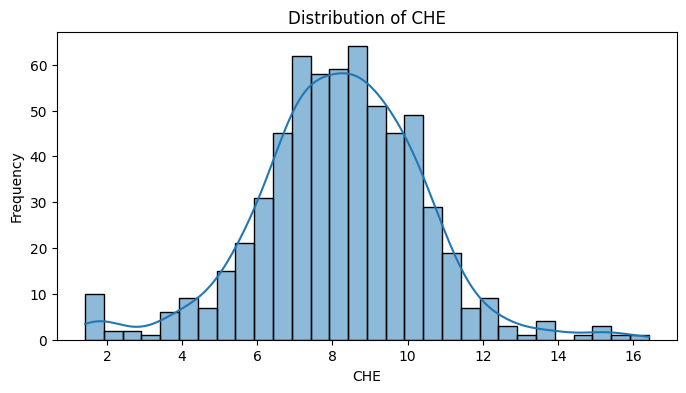

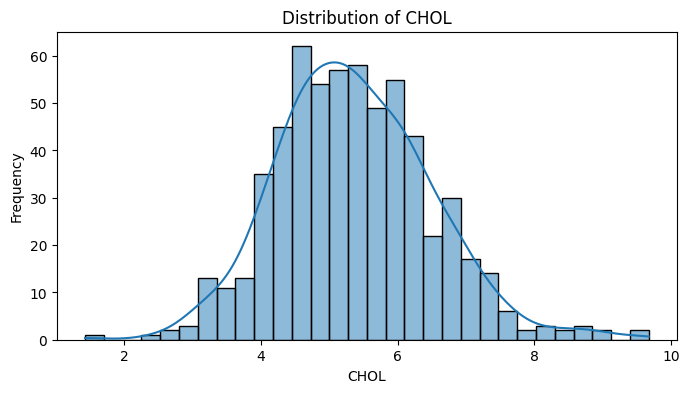

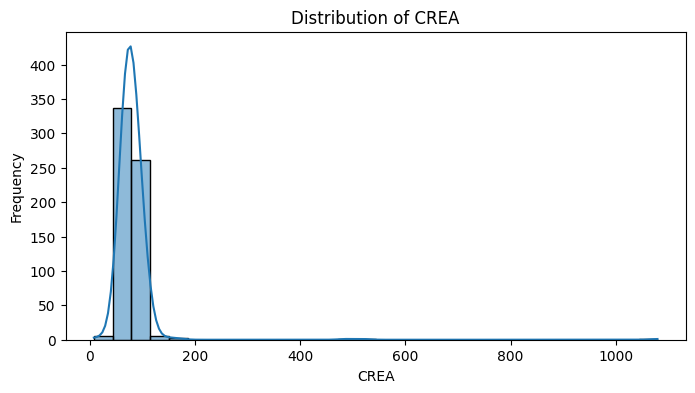

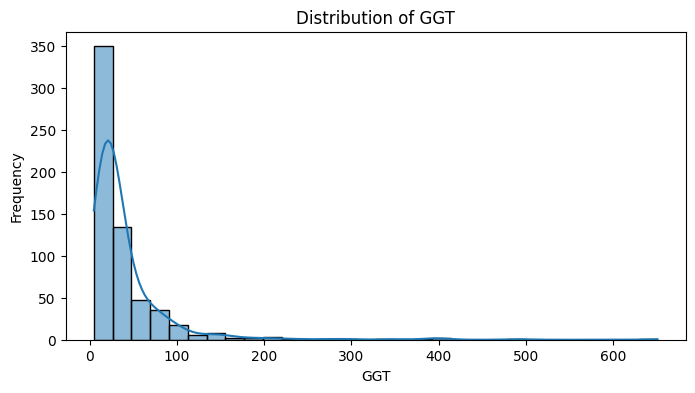

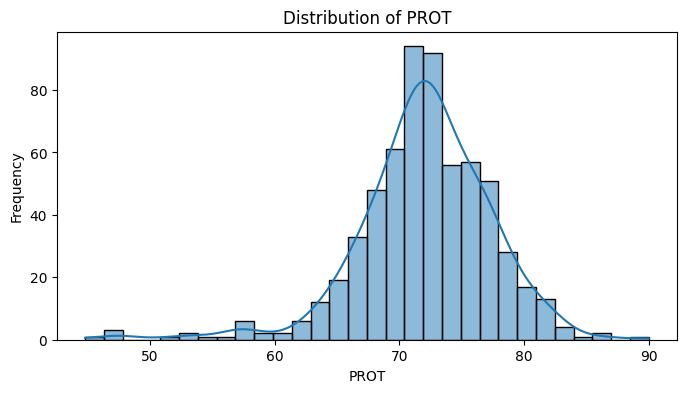

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Distribution plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


Step 0.3: Correlation Heatmap

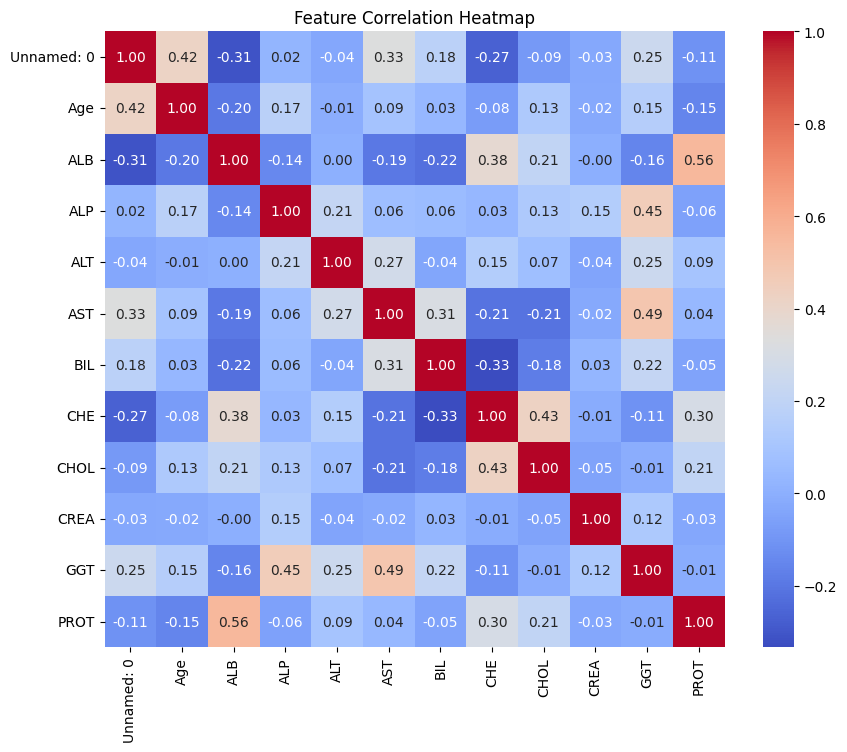

In [3]:
# Select numeric columns only for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


Step 0.4: Boxplots for Outlier Detection

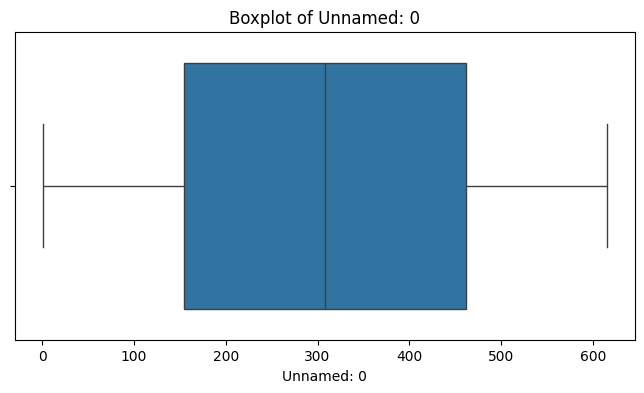

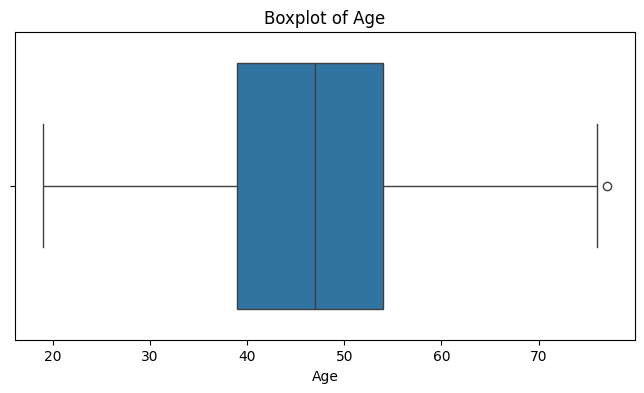

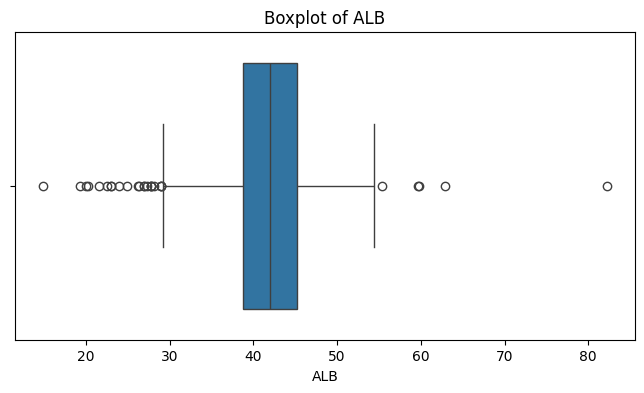

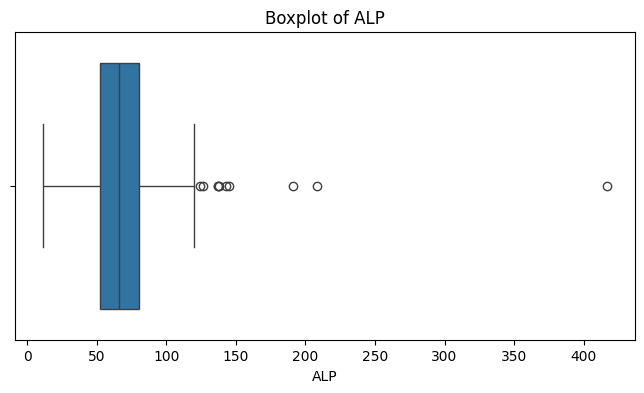

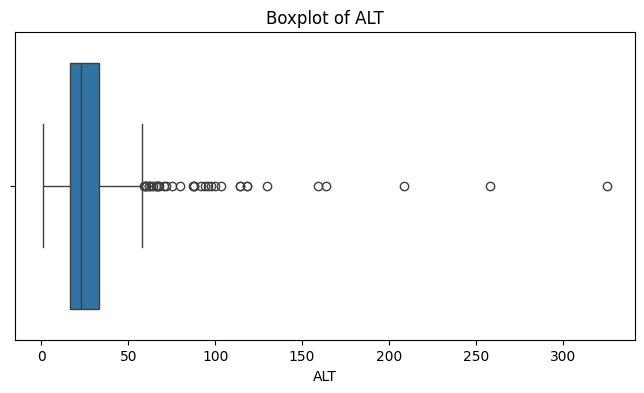

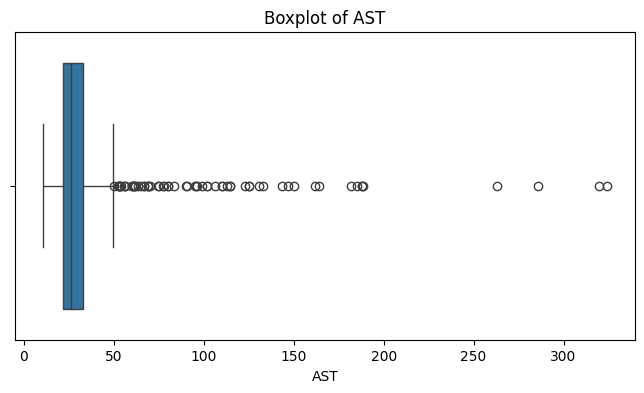

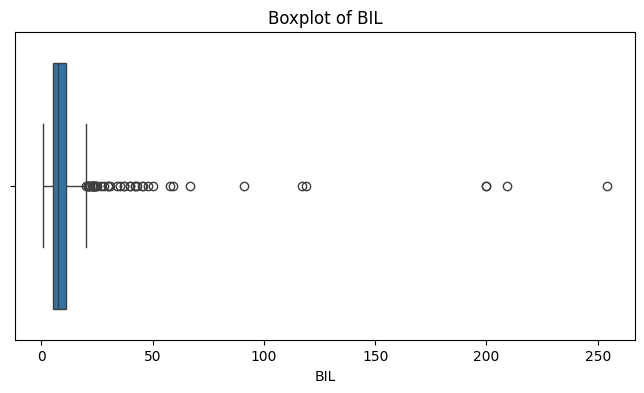

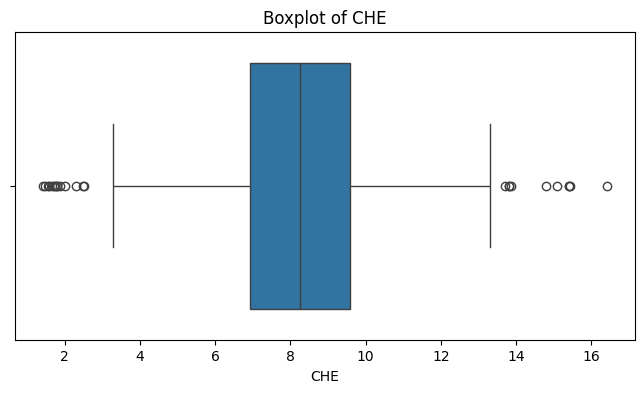

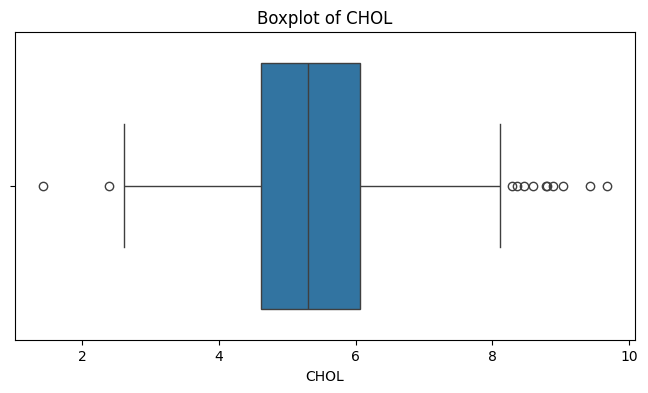

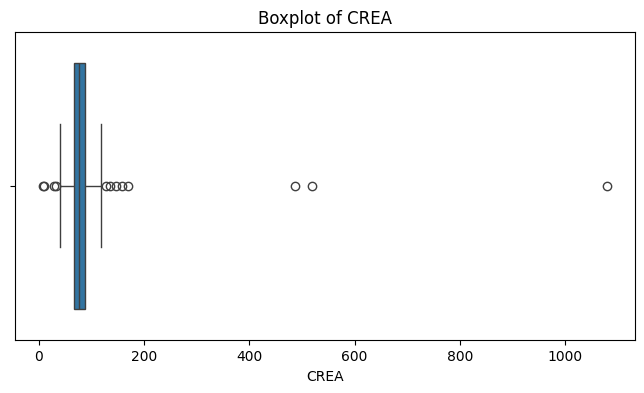

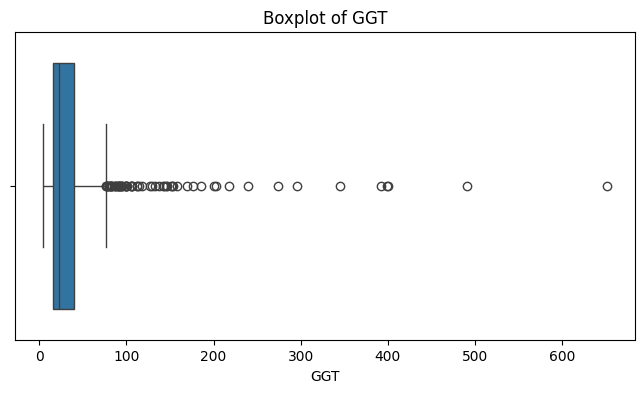

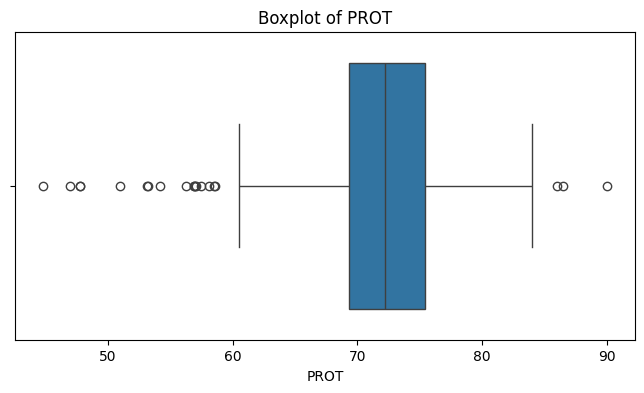

In [4]:
# Boxplots to detect outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


Step 0.5: Analyze Categorical Features


Value Counts for Category:
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_16240\1423386064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


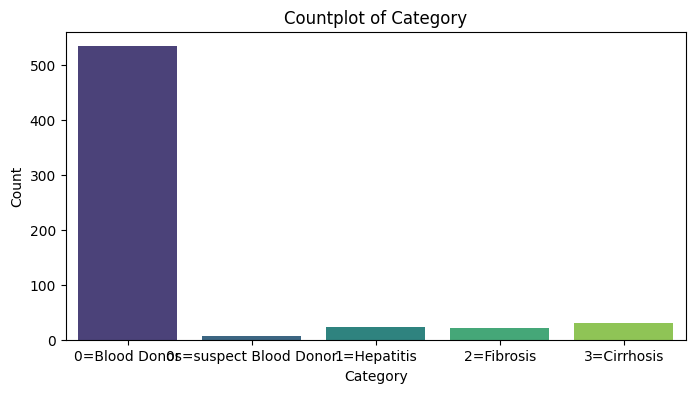


Value Counts for Sex:
Sex
m    377
f    238
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_16240\1423386064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


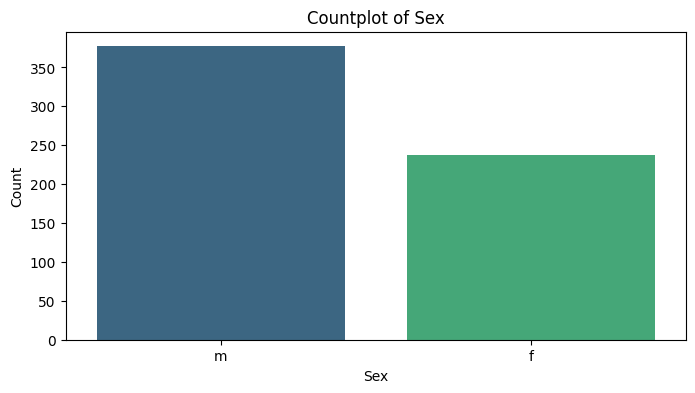

In [5]:
# Check for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

if len(categorical_features) > 0:
    for feature in categorical_features:
        print(f"\nValue Counts for {feature}:")
        print(df[feature].value_counts())

        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[feature], palette='viridis')
        plt.title(f"Countplot of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()


Step 0.1: Handle Missing Values

In [6]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical features with the mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# Impute missing values for categorical features with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Check if there are any missing values left
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


Step 0.2: Scale Numerical Features

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the processed data
print("\nFirst 5 Rows of Processed Data:")
print(df.head())



First 5 Rows of Processed Data:
   Unnamed: 0       Category       Age Sex       ALB       ALP       ALT  \
0   -1.729237  0=Blood Donor -1.533616   m -0.540647 -0.616004 -0.816054   
1   -1.723604  0=Blood Donor -1.533616   m -0.540647  0.078682 -0.410992   
2   -1.717971  0=Blood Donor -1.533616   m  0.914850  0.250402  0.304747   
3   -1.712339  0=Blood Donor -1.533616   m  0.273738 -0.635517  0.084520   
4   -1.706706  0=Blood Donor -1.533616   m -0.419356  0.226986  0.163172   

        AST       BIL       CHE      CHOL      CREA       GGT      PROT  
0 -0.383693 -0.198236 -0.574734 -1.904676  0.497070 -0.502286 -0.564372  
1 -0.305057 -0.381375  1.349161 -0.506078 -0.146590 -0.438203  0.826102  
2  0.538767 -0.269457  0.291926 -0.149747  0.094783 -0.115957  1.345212  
3 -0.368571  0.381706 -0.393234 -0.559528 -0.025903 -0.104971  0.677784  
4 -0.302033 -0.091404  0.432588 -0.933675 -0.106361 -0.176378 -0.619991  


In [8]:
print(df['Category'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


Step 1.1: Train the Anomaly Detection Model

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Label encode the 'Sex' column (and any other categorical columns if needed)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Convert 'm' to 0, 'f' to 1

# Create the 'target' column based on the 'Category' column
df['target'] = df['Category'].apply(lambda x: 0 if x == '0=Blood Donor' else 1)

# Separate features and target
X = df.drop(columns=['Unnamed: 0', 'Category', 'target'])  # Drop irrelevant and target columns
y = df['target']

# Split the data: use only normal samples for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_normal = X_train[y_train == 0]  # Use only normal samples (target == 0)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_normal)

# Predict anomalies on the test set
y_pred = model.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert -1 to 1 (anomaly), 1 to 0 (normal)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[132  21]
 [  4  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       153
           1       0.57      0.88      0.69        32

    accuracy                           0.86       185
   macro avg       0.77      0.87      0.80       185
weighted avg       0.90      0.86      0.88       185



PCA Visualization of Anomalies

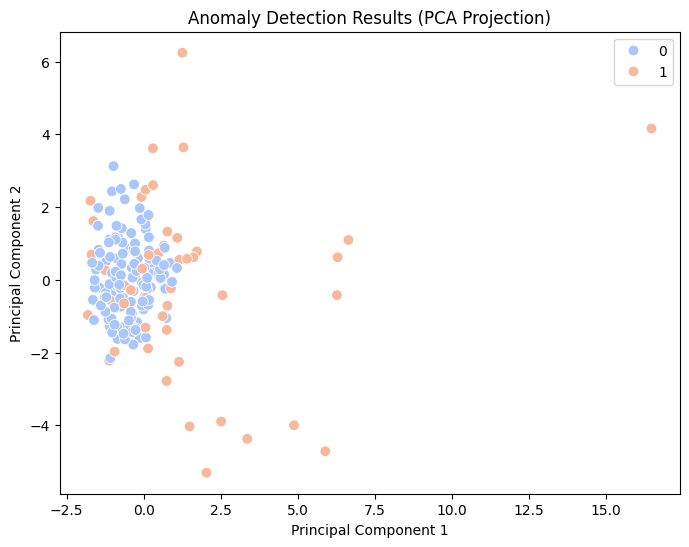

Explained Variance by the first two components: 0.4675990928859895


In [10]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='coolwarm', s=60)
plt.title('Anomaly Detection Results (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance by the first two components
print(f"Explained Variance by the first two components: {np.sum(pca.explained_variance_ratio_)}")


Step 1.2: Visualize ROC Curve

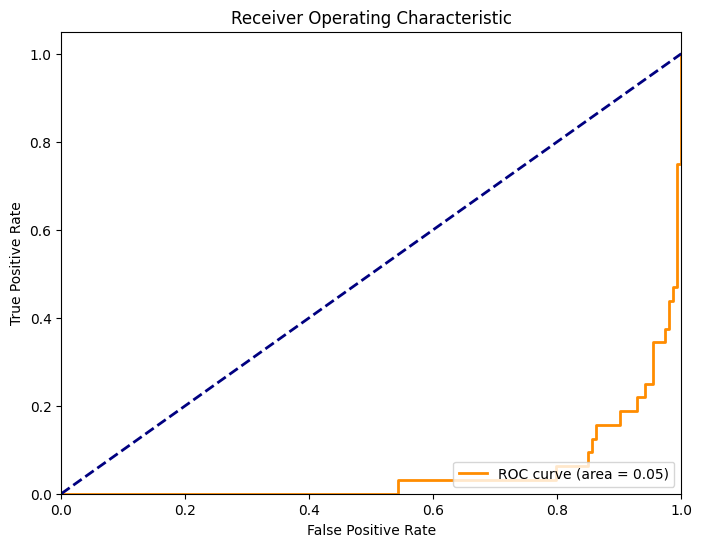

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve
y_prob = model.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


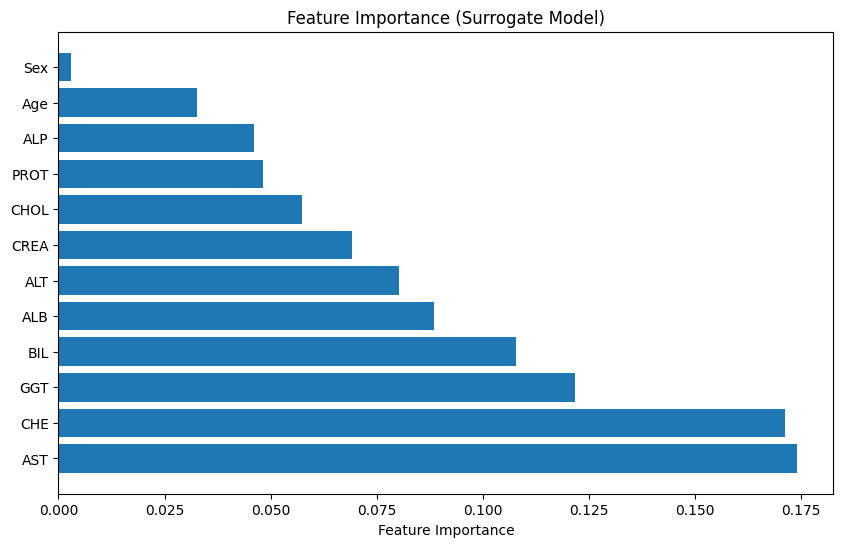

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestClassifier

# Assuming X_train is your training data and model is your IsolationForest model
# Train the IsolationForest model
model = IsolationForest()
model.fit(X_train)

# Train a surrogate RandomForestClassifier to estimate feature importances
surrogate_model = RandomForestClassifier()
surrogate_model.fit(X_train, model.predict(X_train))

# Get feature importances from the surrogate model
feature_importances = surrogate_model.feature_importances_

# Sort features based on importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Surrogate Model)")
plt.show()

 Train a Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the accuracy of the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:")
print(f"Accuracy: {accuracy_dt}")



Decision Tree Accuracy:
Accuracy: 0.9243243243243243


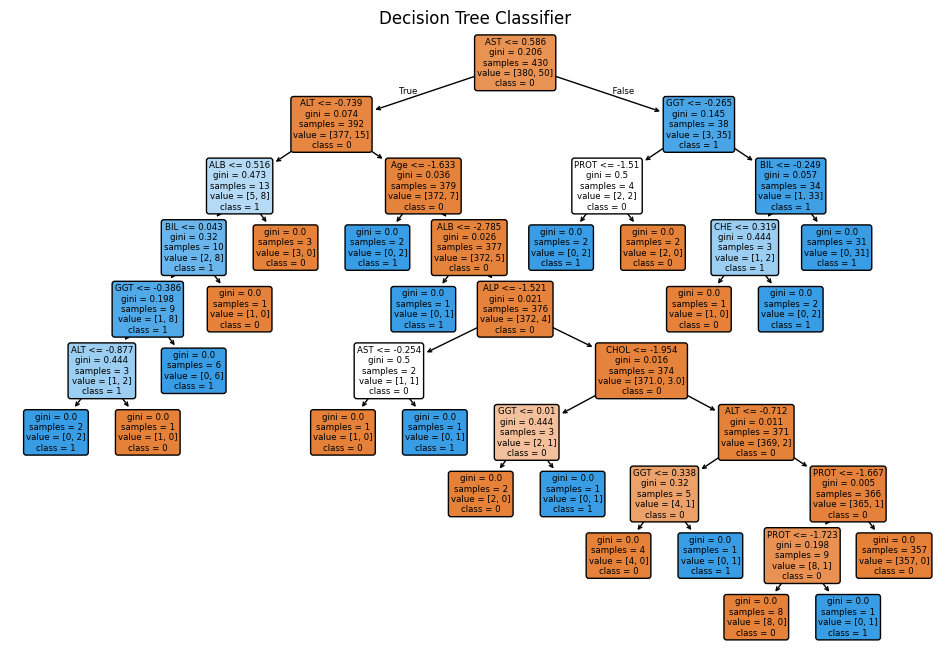

In [14]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.title("Decision Tree Classifier")
plt.show()


Feature Importance Analysis

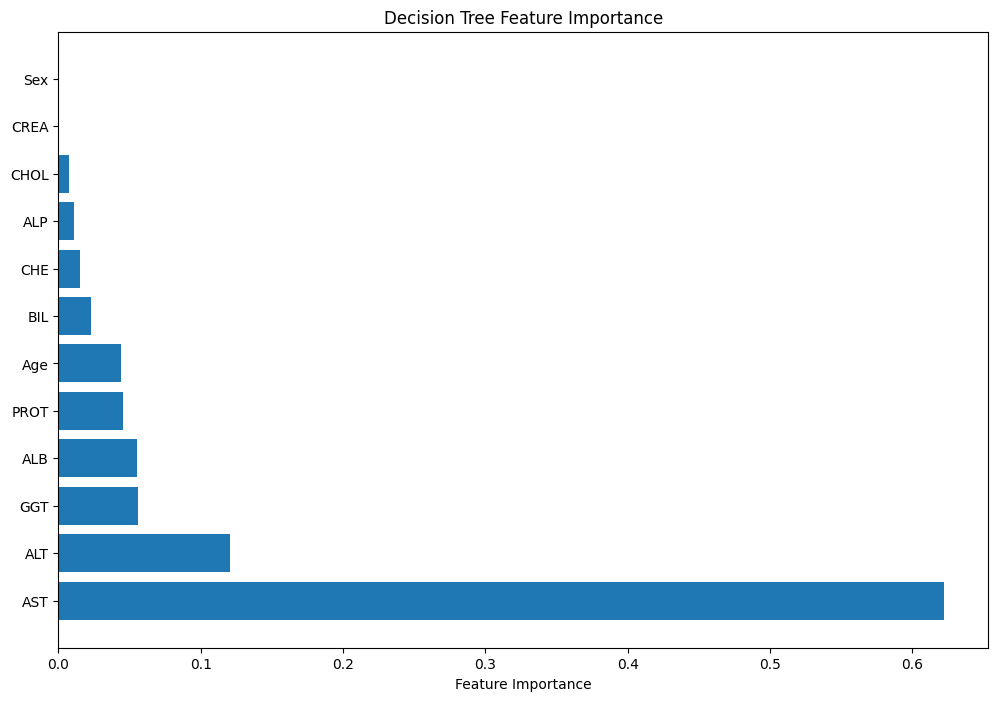

In [15]:
# Plot feature importance from Decision Tree
feature_importance = dt_model.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(X_train.shape[1]), feature_importance[indices])
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


High-Performance Model (XGBoost Classifier)
Train an XGBoost Classifier

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the accuracy of the XGBoost Classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Accuracy:")
print(f"Accuracy: {accuracy_xgb}")



XGBoost Accuracy:
Accuracy: 0.9675675675675676


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 SHAP Explanations

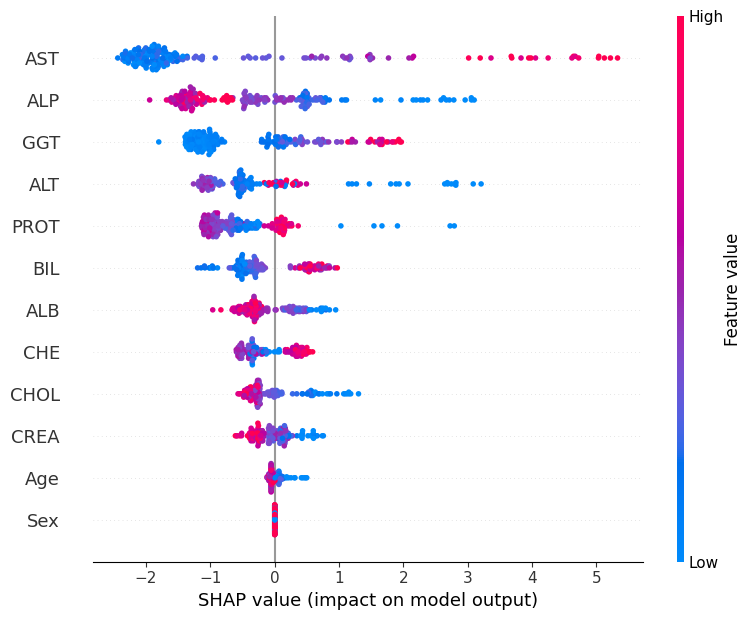

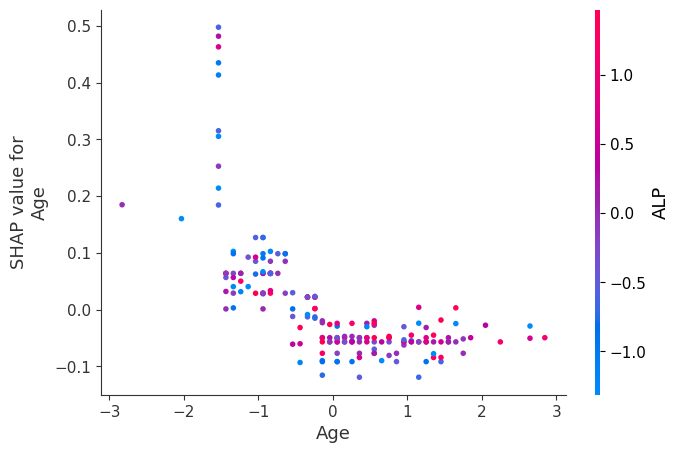

In [17]:
import shap

# Create an explainer for the trained model
explainer = shap.TreeExplainer(xgb_model)  # You can also use best_xgb_model here after tuning
shap_values = explainer.shap_values(X_test)

# Summary Plot to visualize feature importance
shap.summary_plot(shap_values, X_test)

# SHAP Dependence Plot for a specific feature (e.g., 'Age')
shap.dependence_plot("Age", shap_values, X_test)


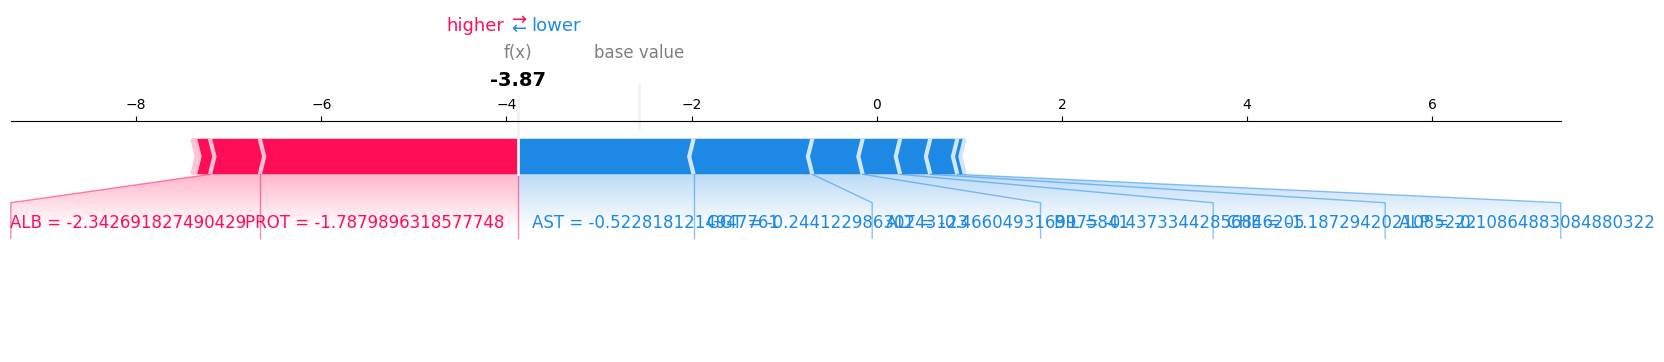

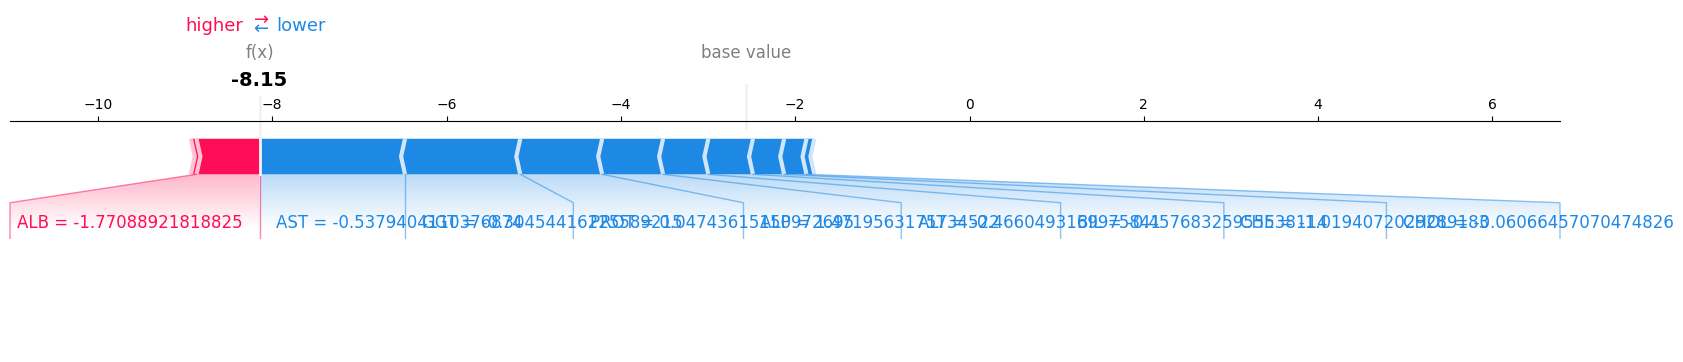

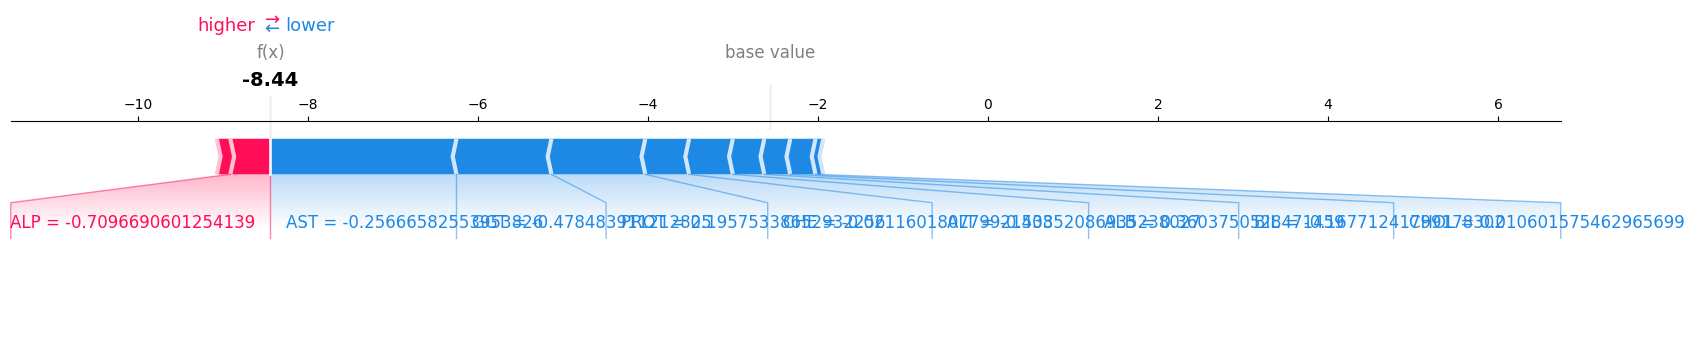

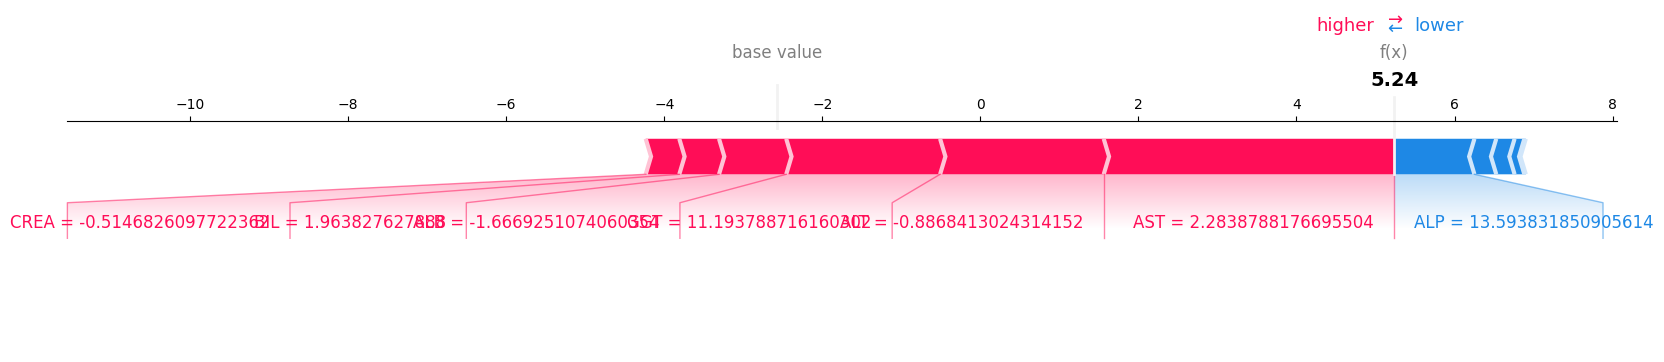

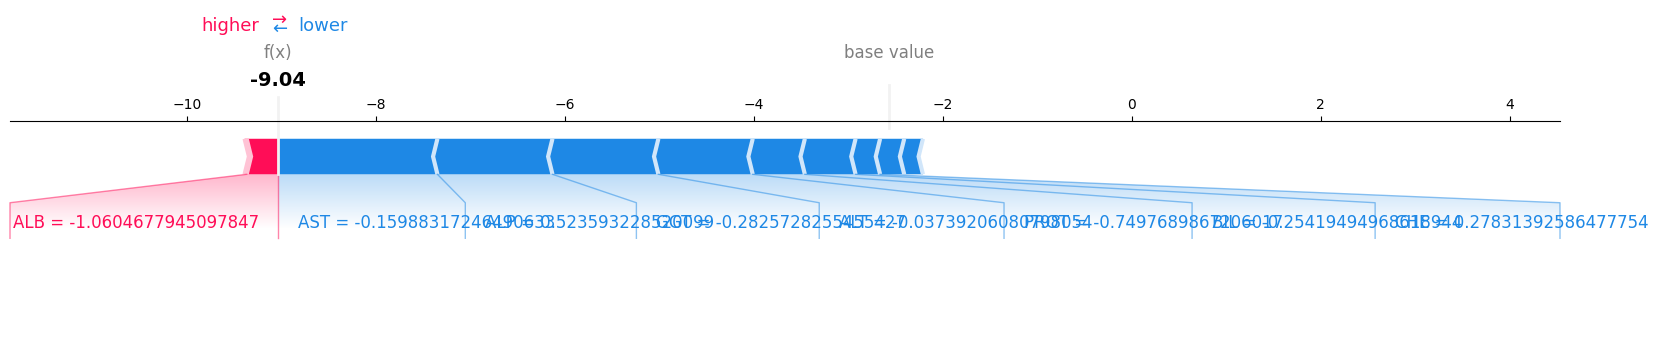

In [18]:
import shap
import matplotlib.pyplot as plt

# Create an explainer for the trained model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Generate static force plot for the first 5 data points
for i in range(5):
    shap.initjs()  # This is used for JS-based visualization, but will not affect static output
    # Generate the force plot (this is the static version)
    shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], matplotlib=True)
    plt.show()


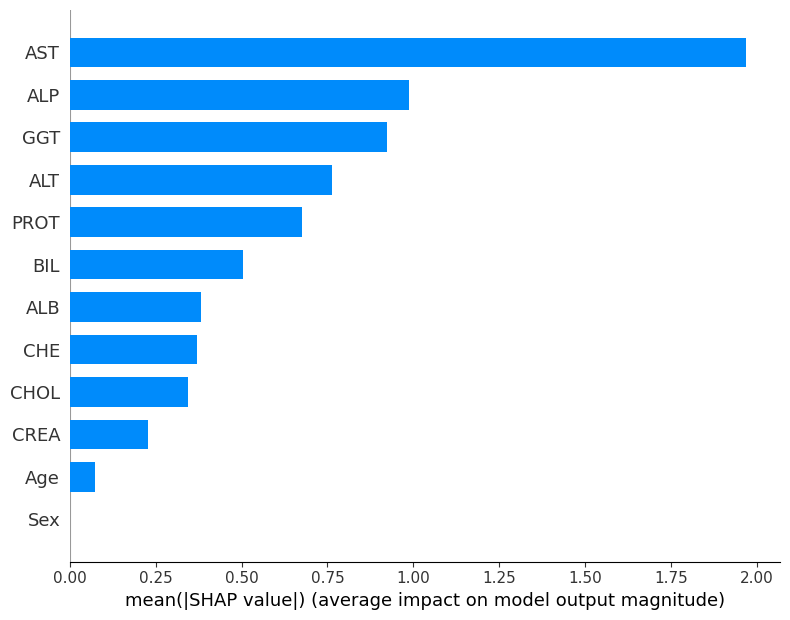

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


Train an XGBoost Classifier

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train an XGBoost classifier on the imputed data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9675675675675676

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.93      0.88      0.90        32

    accuracy                           0.97       185
   macro avg       0.95      0.93      0.94       185
weighted avg       0.97      0.97      0.97       185


Confusion Matrix for XGBoost:
[[151   2]
 [  4  28]]


Hyperparameter Tuning for XGBoost

In [21]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_xgb_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost with Best Hyperparameters Accuracy:", accuracy_score(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

XGBoost with Best Hyperparameters Accuracy: 0.9783783783783784


SHAP Explanations with XGBoost

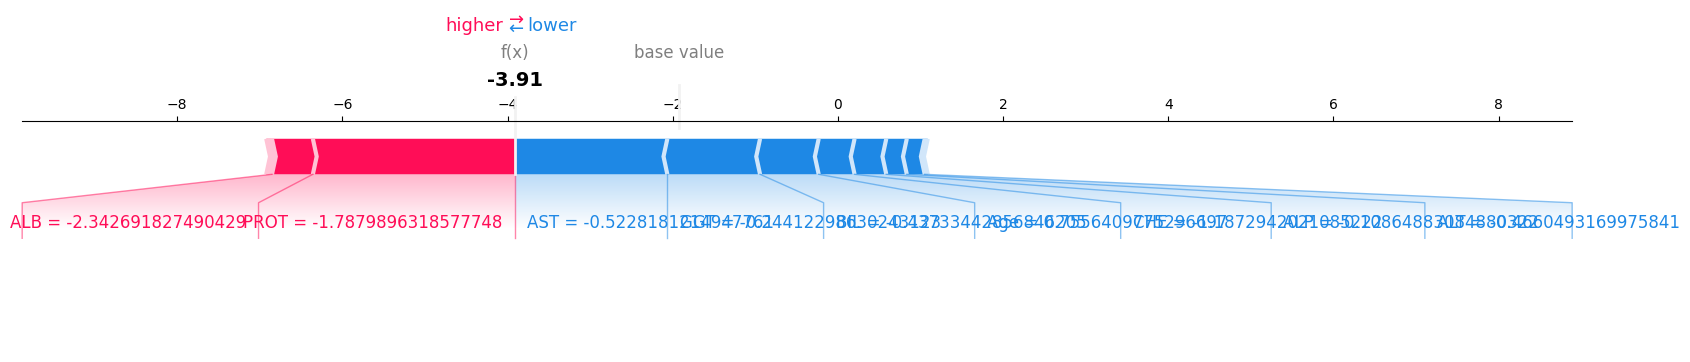

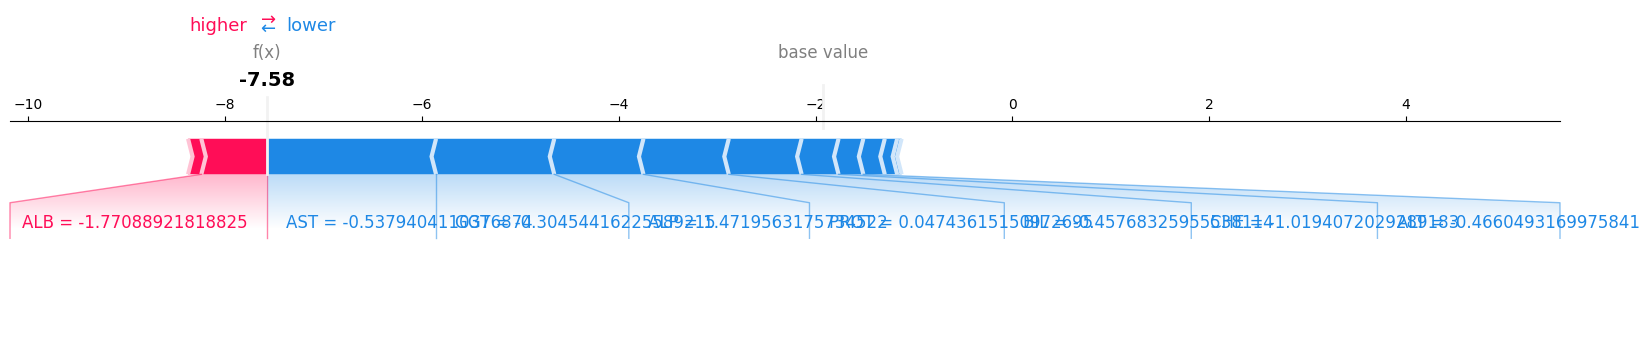

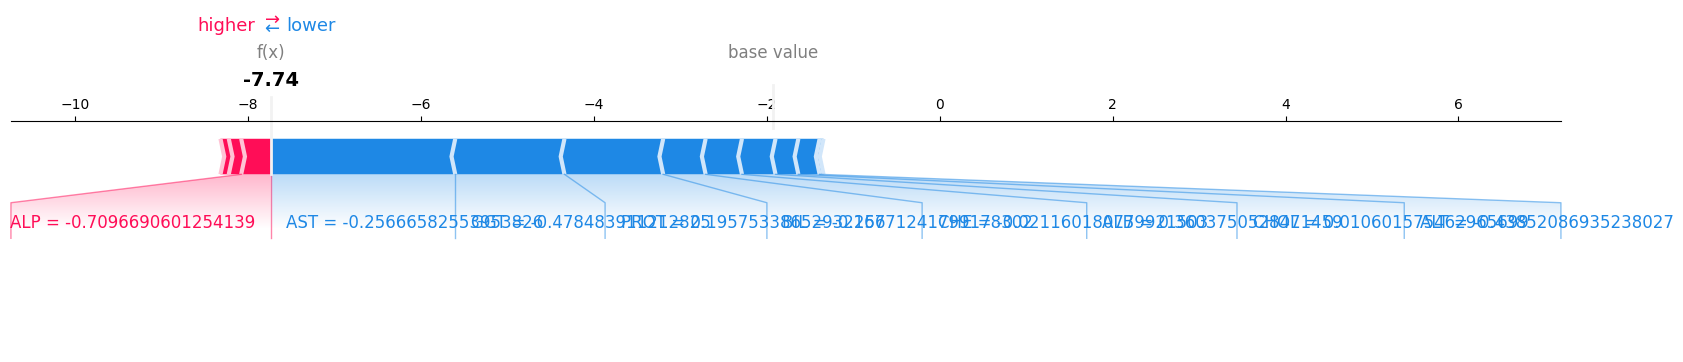

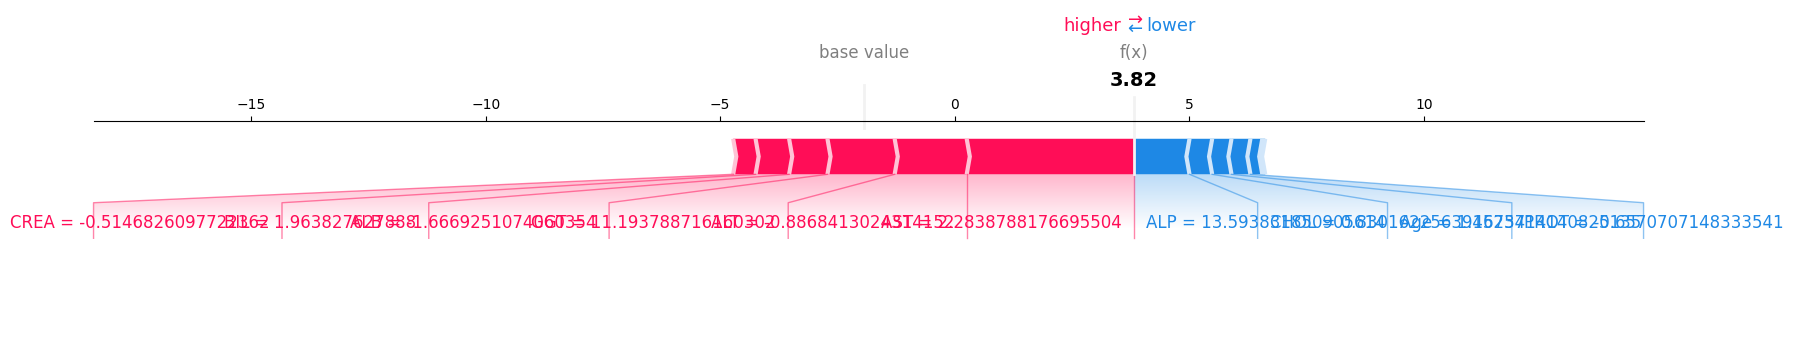

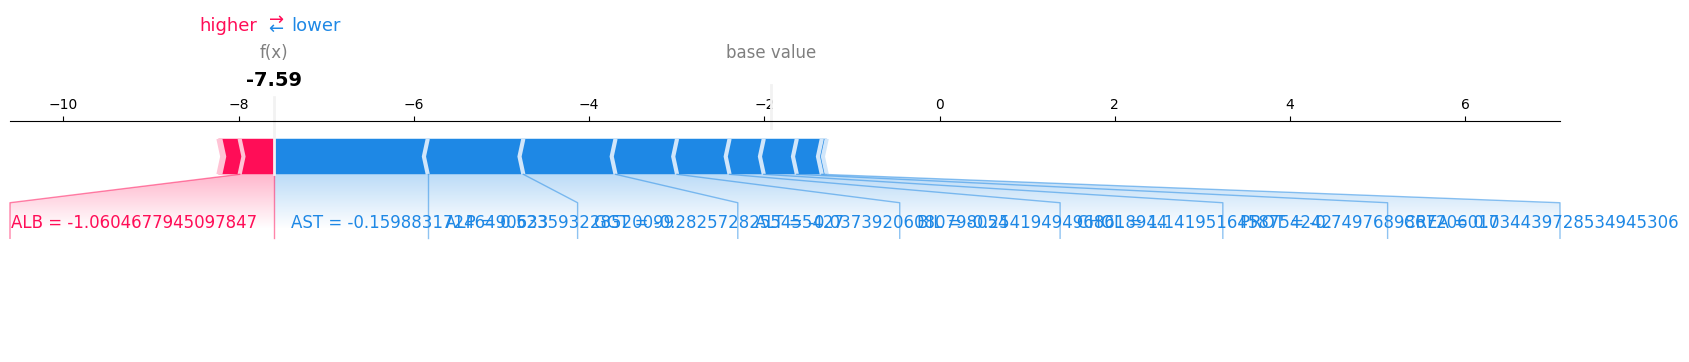

In [22]:
# Create an explainer for the XGBoost model
explainer_xgb = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Visualize SHAP values for the first 5 data points
for i in range(5):
    shap.initjs()  # For interactive plots
    shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[i], X_test.iloc[i], matplotlib=True)
    plt.show()


Combined Class for the Models:

In [23]:
class CombinedModel:
    def __init__(self, anomaly_model, decision_tree_model, xgb_model):
        self.anomaly_model = anomaly_model
        self.decision_tree_model = decision_tree_model
        self.xgb_model = xgb_model
    
    def fit(self, X_train, y_train):
        # Fit each model
        self.anomaly_model.fit(X_train[y_train == 0])  # Train on normal samples for anomaly detection
        self.decision_tree_model.fit(X_train, y_train)  # Fit decision tree classifier
        self.xgb_model.fit(X_train, y_train)  # Fit XGBoost classifier
    
    def predict(self, X_test):
        # Predict with all models and combine results
        anomaly_preds = self.anomaly_model.predict(X_test)
        decision_tree_preds = self.decision_tree_model.predict(X_test)
        xgb_preds = self.xgb_model.predict(X_test)
        
        # Here you can implement a strategy to combine model predictions (e.g., majority vote)
        final_preds = (anomaly_preds + decision_tree_preds + xgb_preds) / 3
        return final_preds.round()

# Instantiate and fit the combined model
combined_model = CombinedModel(anomaly_model=model, decision_tree_model=dt_model, xgb_model=best_xgb_model)
combined_model.fit(X_train, y_train)

# Make predictions
y_pred_combined = combined_model.predict(X_test)

# Evaluate the combined model
print("Combined Model Accuracy:", accuracy_score(y_test, y_pred_combined))


Combined Model Accuracy: 0.8378378378378378


Evaluation and Reporting


Combined Model Confusion Matrix:
[[151   2]
 [ 28   4]]

Combined Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       153
           1       0.67      0.12      0.21        32

    accuracy                           0.84       185
   macro avg       0.76      0.56      0.56       185
weighted avg       0.81      0.84      0.79       185



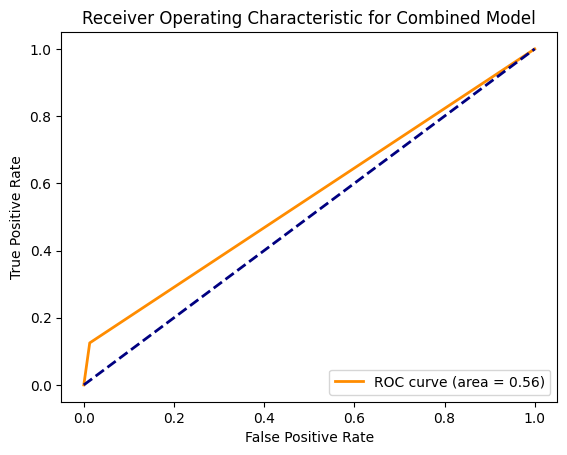

In [24]:
# Confusion Matrix
print("\nCombined Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_combined))

# Classification Report
print("\nCombined Model Classification Report:")
print(classification_report(y_test, y_pred_combined))

# ROC Curve
fpr_combined, tpr_combined, _ = roc_curve(y_test, y_pred_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)
plt.plot(fpr_combined, tpr_combined, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_combined)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Combined Model')
plt.legend(loc='lower right')
plt.show()
